# 1. Vorlesung Nichtlineare Regelungstechnik 1

## Interaktives Beispiel zum Thema Bifurkation

In diesem Notebook können Sie das Verhalten des Systems

\begin{align*}
\ddot y + ay+y^3=0
\end{align*}

in Abhängigkeit von den Werten des Parameters $a$ in der Phasenebene untersuchen. Für $a \geq 0$ hat das System genau eine Ruhelage, für $a < 0$ drei. In diesem System liegt eine sogenannte **Heugabel-Bifurkation** vor. Der Bifurkationswert ist $a = 0$.

In diesem Notebbook werden auch symbolische Rechnungen mit dem Modul SymPy durchgeführt.

---

Die aktuelle Fassung dieses Notebooks findet sich in folgendem Repositorium:

https://gitlab.hrz.tu-chemnitz.de/rst/public/teaching/nl1-nbviewer-content

Sie können zur Entwicklung/ Verbesserung über Merge Requests beitragen!

---

<p style="font-family:Courier New; font-size:10pt">
Copyright (c) 2019-2023 Max Pritzkoleit und Jan Winkler, TU Dresden, Germany
</p>

<p style="font-family:Courier New; font-size:10pt">
This program is free software: you can redistribute it and/or modify<br>
it under the terms of the GNU General Public License as published by<br>
the Free Software Foundation, either version 3 of the License, or<br>
(at your option) any later version.
</p>
    
<p style="font-family:Courier New; font-size:10pt">
This program is distributed in the hope that it will be useful,<br>
but WITHOUT ANY WARRANTY; without even the implied warranty of<br>
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the<br>
GNU General Public License for more details: <br>
<a href=https://www.gnu.org/licenses/gpl-3.0.txt>https://www.gnu.org/licenses/gpl-3.0.txt</a>.
</p>

---

# Beispiel Heugabel-Bifurkation

## Import der nötigen Module

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
from sympy import init_printing

## Visualisierung des Vektorfeldes in Abhängigkeit vom Parameter $a$ des Systems

Die nachfolgend definierte Funktion wird weiter unten an ein Bedienelement (Widget) übergeben, welches genutzt werden kann, um den Parameter $a$ zu verstellen. Dazu wird die `matplotlib`-Funktion `streamplot` verwendet, welche jedem Punkt $(x_1, x_2)$ den zugehörigen Vektor $(f_1(x_1, x_2), f_2(x_1, x_2))$ zuordnet und tangential zu diesen den Fluss zeichnet. [Dokumentation...](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.streamplot.html)

In [2]:
def pitchfork_plot(a):

    # Gitter aufbauen
    x1, x2 = np.meshgrid(np.arange(-2, 2, 0.1), np.arange(-2, 2, 0.1))
    
    # Rechte Seite der Dgl.
    x1dot = x2
    x2dot = -a*x1 - x1**3

    # Zeichnen und beschriften
    plt.streamplot(x1, x2, x1dot, x2dot)
    plt.ylabel(r'$\dot y$')
    plt.xlabel(r'$y$')
    plt.title('Phaseplane: $\ddot y + ay+y^3=0$')
    plt.grid()
    plt.show()

### Widget zur Beeinflussung der Visualisierung

Durch Verschieben des Schiebereglers kann der Parameter $a$ im Wertebereich $[-2, 2]$ variiert werden.

In [3]:
interact(pitchfork_plot, a=widgets.FloatSlider(min=-2, max=2, step=0.1))

interactive(children=(FloatSlider(value=0.0, description='a', max=2.0, min=-2.0), Output()), _dom_classes=('wi…

<function __main__.pitchfork_plot(a)>

Für $a<0$ besitzt das System eine instabile und zwei stabile Ruhelagen.

## Symbolische Bestimmung der Ruhelagen in Abhängigkeit von $a$

Hier wird gezeigt, wie die Ruhelagen des Systems mit Hilfe von Computeralgebra berechnet werden können. Zum Einsatz kommt das Modul [SymPy](https://www.sympy.org).

### Festlegung der symbolischen Variablen

In [4]:
y_sym = sp.Symbol('y')
a_sym = sp.Symbol('a')

### Berechnung der Ruhelagen

Die Ruhelagen werden bestimmt, indem sämtliche Zeitableitungen in der System-Dgl. gleich null gesetzt werden. Es ist also die Gleichung

\begin{align*}
ay + y^3=0
\end{align*}

zu lösen. Hierzu dient die sympy-Funktion `solve`. Das zweite Argument definiert die unabhängige Variable.

In [5]:
y0_sym = sp.solve(a_sym * y_sym + y_sym**3, y_sym)
y0_sym

[0, -sqrt(-a), sqrt(-a)]

Die Werte der Ruhelagen in Abhängigkeit von $a$ können geplottet werden. Dazu muss der symbolische Ausdruck der Lösung in einen numerisch auswertbaren umgewandelt werden. Diesen Vorgang nennt man *lambdify*.

Die Zeile
```python
y0_fnc1 = sp.lambdify(a, y0[1])
```

sorgt dafür, dass eine Funktion `y0_fcn1` erzeugt wird, deren Argument gleich dem Parameter $a$ ist und die den Ausdruck $-\sqrt{-a}$ auswertet und den  Wert zurückgibt. Aufruf z.B. `y0_fcn(-0.25)`.

In [6]:
y0_fnc1 = sp.lambdify(a_sym, y0_sym[1])
y0_fnc2 = sp.lambdify(a_sym, y0_sym[2])

Festlegung des Wertebereiches, den der Parameter $a$ durchlaufen soll. Dieser darf natürlich keine positiven Werte enthalten.

In [7]:
aa = np.arange(-2, 0, 1e-3)

Berechnung der beiden Ruhelagen in Abhängigkeit von $a$,.

In [8]:
y0_a1 = y0_fnc1(aa) 
y0_a2 = y0_fnc2(aa) 

Darstellung der Ergebnisse. Die Ruhelage $y= 0$ wird von Hand eingetragen.

Text(0.5, 1.0, 'Ruhelagen in Abhängigkeit von $a$')

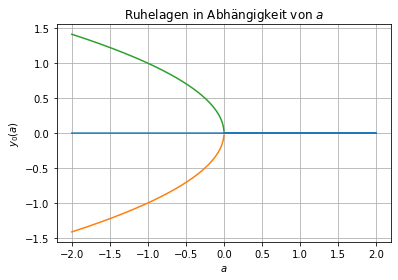

In [9]:
# Erste Ruhelage 0
plt.plot(np.hstack((aa, -aa)), np.zeros_like(aa).repeat(2))

# Zweite Ruhelage -\sqrt{-a}
plt.plot(aa, y0_a1)

# Dritte Ruhelage \sqrt{-a}
plt.plot(aa, y0_a2)

plt.grid(True)
plt.ylabel(r'$y_0(a)$')
plt.xlabel(r'$a$')
plt.title(r'Ruhelagen in Abhängigkeit von $a$')

# Beispiel Hopf-Bifurkation

Nun wird das System
\begin{align}
\ddot y + (y^2 - a) \cdot \dot y + y = 0
\end{align}
untersucht. Dieses System weist für $a > 0$ einen Grenzzyklus auf, für $a < 0$ jedoch nicht. Dies kann man sich schnell anschaulich überlegen: Für $a \geq 0$ ist der Faktor vor $\dot y$ für $|y| < \sqrt{a}$ positiv. Das System wird also periodisch beschleunigt und zwar immer dann, wenn es sich zu stark abgebremst hat. Für negative $a$ ist der Faktor vor $\dot y$ jedoch immer positiv, es wird also stets Energie abgebaut und die Bewegung kommt irgendwann zum Erliegen.

Mehr dazu in Vorlesung Nr. 2 bzw. 3.

In [10]:
def hopf_plot(a):
    x1, x2 = np.meshgrid(np.arange(-4, 4, 0.1), np.arange(-4, 4, 0.1))
    x1dot = x2
    x2dot = -x1-(x1**2-a)*x2
    plt.streamplot(x1, x2, x1dot, x2dot)
    plt.ylabel(r'$\dot y$')
    plt.xlabel(r'$y$')
    plt.title('Phaseplane: $\ddot y + (y^2-a)\dot y + y =0$')
    plt.grid()
    plt.show()

In [11]:
interact(hopf_plot, a=widgets.FloatSlider(min=-2,max=2,step=0.1))

interactive(children=(FloatSlider(value=0.0, description='a', max=2.0, min=-2.0), Output()), _dom_classes=('wi…

<function __main__.hopf_plot(a)>